In [1]:
%cd ..

/home/vagrant/Python/projects/ashrae-energy-prediction


In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import plotly.express as px
import shap
shap.initjs()
import lightgbm as lgb
from scripts.util import load
from scripts.data.loader import DataLoader

In [197]:
train = pd.read_feather("data/processed/train.ftr")
train["yh"] = np.expm1(load("models/target/19-11-01_10-18_(simple_lgbm)-train.pkl"))

In [4]:
train.head()

building_id  meter  timestamp  meter_reading  site_id primary_use  \
0            0      0 2016-01-01            0.0        0   Education   
1            1      0 2016-01-01            0.0        0   Education   
2            2      0 2016-01-01            0.0        0   Education   
3            3      0 2016-01-01            0.0        0   Education   
4            4      0 2016-01-01            0.0        0   Education   

   square_feet  year_built  floor_count  air_temperature  ...  \
0         7432      2008.0          NaN             25.0  ...   
1         2720      2004.0          NaN             25.0  ...   
2         5376      1991.0          NaN             25.0  ...   
3        23685      2002.0          NaN             25.0  ...   
4       116607      1975.0          NaN             25.0  ...   

   sea_level_pressure  wind_direction  wind_speed  hour  day  month  \
0         1019.700012             0.0         0.0     0    1      1   
1         1019.700012             0.0         0.0     0    1      1   
2         1019.700012             0.0         0.0     0    1      1   
3         1019.700012             0.0         0.0     0    1      1   
4         1019.700012             0.0         0.0     0    1      1   

   dayofweek  meter_label  log_meter_reading        yh  
0          4  electricity                0.0  0.603906  
1          4  electricity                0.0  0.693033  
2          4  electricity                0.0 -0.230116  
3          4  electricity                0.0 -0.245065  
4          4  electricity                0.0 -0.068796  

[5 rows x 23 columns]

In [5]:
model0 = load("models/19-11-01_10-18_(simple_lgbm)-0.model")

In [40]:
df = train.query("building_id == 800")[["timestamp", "meter_label", "meter_reading", "yh"]]\
    .melt(id_vars=["timestamp", "meter_label"],value_vars=["meter_reading", "yh"])
px.line(df, x="timestamp", y="value", color="meter_label", line_dash="variable")

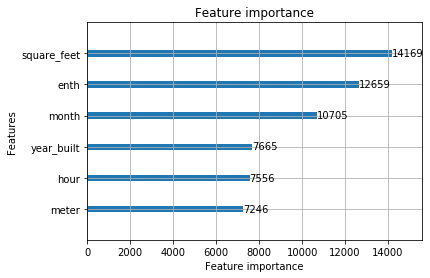

In [24]:
lgb.plot_importance(model0)

In [42]:
model0.feature_name()

['meter', 'square_feet', 'year_built', 'hour', 'month', 'enth']